In [1]:
import veloxchem as vlx
import multipsi as mtp
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [2]:
# HF and CI calculation of OH.

mol_str="""
O 0.0000 0.0000  0.0000
H 0.0000 0.8957 -0.3167
"""
molecule = vlx.Molecule.read_molecule_string(mol_str, units='angstrom')
molecule.set_multiplicity(2)
basis = vlx.MolecularBasis.read(molecule, "STO-3G", ostream=None)
scf_drv = vlx.ScfUnrestrictedDriver()
scf_drv.ostream.mute()
scf_results = scf_drv.compute(molecule, basis)
E_OH_hf = scf_drv.get_scf_energy()

space = mtp.OrbSpace(molecule,scf_drv.mol_orbs)
space.fci()
CIdrv = mtp.CIDriver()
ci_results = CIdrv.compute(molecule, basis, space)
E_OH_FCI = ci_results["energies"][0]

# HF calculation of H, equivalent to CI

mol_str = "H 0.0000 0.0000 0.0000"
molecule = vlx.Molecule.read_molecule_string(mol_str, units='angstrom')
molecule.set_multiplicity(2)
basis = vlx.MolecularBasis.read(molecule, "STO-3G", ostream=None)
scf_results = scf_drv.compute(molecule, basis)
E_H_hf = scf_drv.get_scf_energy()

# HF and CI calculations of water with stretching of one O-H bond

mol_template = """
O 0.0000 0.0000  0.0000
H 0.0000 0.8957 -0.3167
H 0.0000 0.0000  OHdist
"""
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()
scf_drv.max_iter = 200

distlist = []
E_hf = []
E_FCI = []
NON = []

# Scan over O-H distances
for dist in [0.7,0.8,0.9,0.95,1.1,1.3,1.5,1.7,2,2.5,3,3.5,4,4.5,5]:
    mol_str = mol_template.replace("OHdist", str(dist))
    molecule = vlx.Molecule.read_molecule_string(mol_str, units='angstrom')
    basis = vlx.MolecularBasis.read(molecule, "STO-3G", ostream=None)
    scf_results = scf_drv.compute(molecule, basis)
    if scf_drv.is_converged:
        distlist.append(dist)
        E_hf.append(scf_drv.get_scf_energy() - E_H_hf - E_OH_hf)
    
        space=mtp.OrbSpace(molecule,scf_drv.mol_orbs)
        space.fci()
        ci_results = CIdrv.compute(molecule,basis,space)
        E_FCI.append(ci_results["energies"][0] - E_H_hf - E_OH_FCI)
        NON.append(ci_results["natural_occupations"][0]) # Get the natural occupation numbers

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              6
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(9,6)

               CI expansion:
               -------------
               Number of determinants:      90


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.75  (multiplicity = 2.0 )
  - Energy : -74.38329622937896
  - Natural orbitals
2.00000 1.99869 1.97455 1.99932 1.00000 0.02745


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              7
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(10,7)

               CI expansion:
               -------------
               Number of determinants:      441


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰──────────────────────────────

                                                                                                                          
                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -74.819578311     7.1e-14      3.7e-03           1    0:00:00


        2     -74.819829844    -2.5e-04      6.8e-06           2    0:00:00


        3     -74.819830980    -1.1e-06      8.1e-07           3    0:00:00


        4     -74.819831110    -1.3e-07      9.3e-09           4    0:00:00


        5     -74.819831113    -2.7e-09      4.6e-10           5    0:00:00


                                                                                                                          
** Convergence reached in 5 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.81983111264724
  - Natural orbitals
2.00000 1.99840 1.97839 1.99225 1.99854 0.02329 0.00913


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              7
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(10,7)

               CI expansion:
               -------------
               Number of determinants:      441


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰──────────────────────────────

                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -74.942351309     1.4e-14      3.6e-03           1    0:00:00


        2     -74.942646705    -3.0e-04      8.1e-06           2    0:00:00


        3     -74.942648452    -1.7e-06      9.2e-07           3    0:00:00


        4     -74.942648638    -1.9e-07      1.8e-08           4    0:00:00


        5     -74.942648643    -5.7e-09      8.5e-10           5    0:00:00


                                                                                                                          
** Convergence reached in 5 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.94264864331373
  - Natural orbitals
2.00000 1.99823 1.97760 1.98805 1.99842 0.02406 0.01364


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              7
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(10,7)

               CI expansion:
               -------------
               Number of determinants:      441


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰──────────────────────────────

                                                                                                                          
                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -74.995624443     1.1e-13      3.6e-03           1    0:00:00


        2     -74.995972550    -3.5e-04      1.0e-05           2    0:00:00


        3     -74.995975171    -2.6e-06      1.1e-06           3    0:00:00


        4     -74.995975439    -2.7e-07      3.5e-08           4    0:00:00


        5     -74.995975451    -1.2e-08      1.5e-09           5    0:00:00


        6     -74.995975451    -3.9e-10      3.7e-11           6    0:00:00


                                                                                                                          
** Convergence reached in 6 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.99597545131124
  - Natural orbitals
2.00000 1.99806 1.97668 1.98169 1.99832 0.02480 0.02045


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              7
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(10,7)

               CI expansion:
               -------------
               Number of determinants:      441


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰──────────────────────────────

                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -75.006738138     1.6e-13      3.5e-03           1    0:00:00


        2     -75.007117231    -3.8e-04      1.2e-05           2    0:00:00


        3     -75.007120421    -3.2e-06      1.2e-06           3    0:00:00


        4     -75.007120745    -3.2e-07      4.6e-08           4    0:00:00


        5     -75.007120762    -1.6e-08      2.1e-09           5    0:00:00


        6     -75.007120762    -5.8e-10      5.7e-11           6    0:00:00


                                                                                                                          
** Convergence reached in 6 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -75.0071207624311
  - Natural orbitals
2.00000 1.99798 1.97542 1.97810 1.99828 0.02562 0.02459


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              7
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(10,7)

               CI expansion:
               -------------
               Number of determinants:      441


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰──────────────────────────────

                                                                                                                          
                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -75.005487169     1.4e-14      3.6e-03           1    0:00:00


        2     -75.005995367    -5.1e-04      1.9e-05           2    0:00:00


        3     -75.006001395    -6.0e-06      1.8e-06           3    0:00:00


        4     -75.006002023    -6.3e-07      1.0e-07           4    0:00:00


        5     -75.006002065    -4.2e-08      6.2e-09           5    0:00:00


        6     -75.006002068    -2.2e-09      2.6e-10           6    0:00:00


                                                                                                                          
** Convergence reached in 6 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -75.00600206752632
  - Natural orbitals
2.00000 1.99780 1.97589 1.95606 1.99819 0.04613 0.02594


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              7
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(10,7)

               CI expansion:
               -------------
               Number of determinants:      441


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰──────────────────────────────

                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -74.968721424    -5.7e-14      4.1e-03           1    0:00:00


        2     -74.969491199    -7.7e-04      3.4e-05           2    0:00:00


        3     -74.969503668    -1.2e-05      3.5e-06           3    0:00:00


        4     -74.969505081    -1.4e-06      2.5e-07           4    0:00:00


        5     -74.969505192    -1.1e-07      1.8e-08           5    0:00:00


        6     -74.969505200    -7.3e-09      9.6e-10           6    0:00:00


                                                                                                                          
** Convergence reached in 6 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.96950519956151
  - Natural orbitals
2.00000 1.99772 1.97487 1.90308 1.99823 0.09924 0.02685


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              7
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(10,7)

               CI expansion:
               -------------
               Number of determinants:      441


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰──────────────────────────────

                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -74.925456682    -1.6e-13      8.9e-03           1    0:00:00


        2     -74.928064786    -2.6e-03      1.2e-04           2    0:00:00


        3     -74.928116030    -5.1e-05      6.4e-06           3    0:00:00


        4     -74.928119175    -3.1e-06      6.1e-07           4    0:00:00


        5     -74.928119557    -3.8e-07      9.9e-08           5    0:00:00


        6     -74.928119618    -6.1e-08      1.3e-08           6    0:00:00


        7     -74.928119626    -8.1e-09      1.4e-09           7    0:00:00


                                                                                                                          
** Convergence reached in 7 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.92811962616096
  - Natural orbitals
2.00000 1.99785 1.97435 1.99845 1.80816 0.19381 0.02739


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              7
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(10,7)

               CI expansion:
               -------------
               Number of determinants:      441


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰──────────────────────────────

                                                                                                                          
                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -74.892686708     0.0e+00      8.9e-03           1    0:00:00


        2     -74.895369763    -2.7e-03      1.2e-04           2    0:00:00


        3     -74.895420606    -5.1e-05      6.1e-06           3    0:00:00


        4     -74.895423566    -3.0e-06      6.2e-07           4    0:00:00


        5     -74.895423987    -4.2e-07      9.1e-08           5    0:00:00


        6     -74.895424046    -5.9e-08      1.2e-08           6    0:00:00


        7     -74.895424055    -8.9e-09      1.7e-09           7    0:00:00


                                                                                                                          
** Convergence reached in 7 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.89542405518911
  - Natural orbitals
2.00000 1.99809 1.97422 1.99874 1.67075 0.33060 0.02759


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              7
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(10,7)

               CI expansion:
               -------------
               Number of determinants:      441


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰──────────────────────────────

                                                                                                                          
                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -74.864306478    -5.7e-14      8.8e-03           1    0:00:00


        2     -74.867019652    -2.7e-03      1.1e-04           2    0:00:00


        3     -74.867068176    -4.9e-05      3.8e-06           3    0:00:00


        4     -74.867070087    -1.9e-06      4.4e-07           4    0:00:00


        5     -74.867070395    -3.1e-07      4.9e-08           5    0:00:00


        6     -74.867070422    -2.6e-08      3.0e-09           6    0:00:00


        7     -74.867070423    -1.7e-09      4.5e-10           7    0:00:00


                                                                                                                          
** Convergence reached in 7 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.86707042334356
  - Natural orbitals
2.00000 1.99843 1.97434 1.99909 1.43905 0.56152 0.02757


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              7
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(10,7)

               CI expansion:
               -------------
               Number of determinants:      441


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰──────────────────────────────

                                                                                                                          
                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -74.849736241    -9.9e-14      8.9e-03           1    0:00:00


        2     -74.852524799    -2.8e-03      1.0e-04           2    0:00:00


        3     -74.852572237    -4.7e-05      2.2e-06           3    0:00:00


        4     -74.852573516    -1.3e-06      2.4e-07           4    0:00:00


        5     -74.852573669    -1.5e-07      3.3e-08           5    0:00:00


        6     -74.852573685    -1.6e-08      2.1e-09           6    0:00:00


        7     -74.852573687    -1.1e-09      2.0e-10           7    0:00:00


                                                                                                                          
** Convergence reached in 7 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.85257368652756
  - Natural orbitals
2.00000 1.99865 1.97451 1.99928 1.17266 0.82744 0.02747


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              7
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(10,7)

               CI expansion:
               -------------
               Number of determinants:      441


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰──────────────────────────────

                                                                                                                          
                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -74.847380257    -5.7e-14      8.9e-03           1    0:00:00


        2     -74.850178685    -2.8e-03      1.0e-04           2    0:00:00


        3     -74.850226008    -4.7e-05      1.7e-06           3    0:00:00


        4     -74.850227193    -1.2e-06      1.2e-07           4    0:00:00


        5     -74.850227251    -5.7e-08      2.1e-08           5    0:00:00


        6     -74.850227262    -1.2e-08      1.4e-09           6    0:00:00


        7     -74.850227263    -6.2e-10      9.1e-11           7    0:00:00


                                                                                                                          
** Convergence reached in 7 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.85022726268907
  - Natural orbitals
2.00000 1.99869 1.97454 1.99931 1.05946 0.94055 0.02745


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              7
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(10,7)

               CI expansion:
               -------------
               Number of determinants:      441


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰──────────────────────────────

                                                                                                                          
                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -74.847067595     1.4e-14      8.8e-03           1    0:00:00


        2     -74.849866128    -2.8e-03      1.0e-04           2    0:00:00


        3     -74.849913490    -4.7e-05      1.7e-06           3    0:00:00


        4     -74.849914669    -1.2e-06      7.9e-08           4    0:00:00


        5     -74.849914706    -3.7e-08      1.1e-08           5    0:00:00


        6     -74.849914712    -6.3e-09      9.5e-10           6    0:00:00


                                                                                                                          
** Convergence reached in 6 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.84991471228099
  - Natural orbitals
2.00000 1.99869 1.97454 1.99932 1.01827 0.98173 0.02745


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              7
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(10,7)

               CI expansion:
               -------------
               Number of determinants:      441


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰──────────────────────────────

                                                                                                                          
                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -74.847031474     7.1e-14      8.8e-03           1    0:00:00


        2     -74.849829497    -2.8e-03      1.0e-04           2    0:00:00


        3     -74.849876849    -4.7e-05      1.7e-06           3    0:00:00


        4     -74.849878195    -1.3e-06      9.0e-08           4    0:00:00


        5     -74.849878230    -3.5e-08      8.6e-09           5    0:00:00


        6     -74.849878235    -5.0e-09      3.5e-10           6    0:00:00


                                                                                                                          
** Convergence reached in 6 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.8498782350695
  - Natural orbitals
2.00000 1.99869 1.97454 0.99894 1.99932 1.00106 0.02745


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              7
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(10,7)

               CI expansion:
               -------------
               Number of determinants:      441


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰──────────────────────────────

                                                                                                                          
                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -74.847031233     0.0e+00      8.8e-03           1    0:00:00


        2     -74.849829408    -2.8e-03      1.1e-04           2    0:00:00


        3     -74.849876676    -4.7e-05      1.7e-06           3    0:00:00


        4     -74.849878048    -1.4e-06      9.0e-08           4    0:00:00


        5     -74.849878081    -3.3e-08      8.3e-09           5    0:00:00


        6     -74.849878086    -4.8e-09      2.1e-10           6    0:00:00


                                                                                                                          
** Convergence reached in 6 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.84987808554015
  - Natural orbitals
2.00000 1.99869 1.97454 0.99981 1.99932 1.00019 0.02745


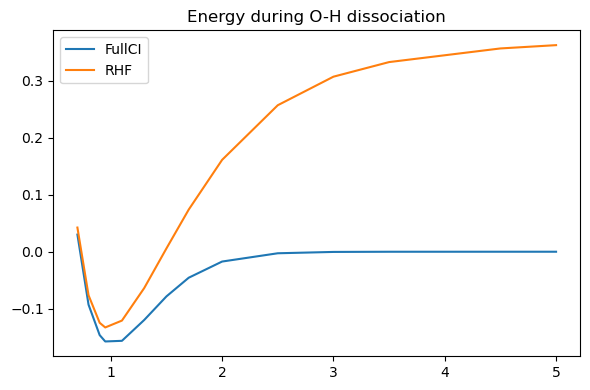

In [3]:
plt.figure(figsize=(6,4))
plt.title('Energy during O-H dissociation')
x = np.array(distlist)
y = np.array(E_FCI)
z = np.array(E_hf)
plt.plot(x,y, label='FullCI')
plt.plot(x,z, label='RHF')
plt.legend()
plt.tight_layout(); plt.show()

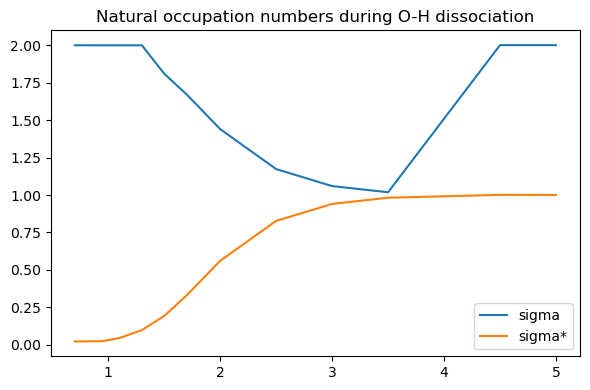

In [4]:
plt.figure(figsize=(6,4))
plt.title('Natural occupation numbers during O-H dissociation')
x = np.array(distlist)
sigma=[]
sigma_star=[]
for NONi in NON: 
    sigma.append(NONi[4])
    sigma_star.append(NONi[5])
y = np.array(sigma)
z = np.array(sigma_star)
plt.plot(x, y, label='sigma')
plt.plot(x, z, label='sigma*')
plt.legend()
plt.tight_layout(); plt.show()

In [5]:
print("Natural orbital occupation numbers at 5 Å")
print(NON[-1])

Natural orbital occupation numbers at 5 Å
[1.9999994  1.9986901  1.97454437 0.9998077  1.99931509 1.0001923
 0.02745103]


In [6]:
E_CASSCF=[]

Mcscf_drv=mtp.McscfDriver()

#Scan over O-H distances
for dist in distlist:
    mol_str = mol_template.replace("OHdist", str(dist))
    molecule = vlx.Molecule.read_molecule_string(mol_str, units='angstrom')
    basis = vlx.MolecularBasis.read(molecule, "STO-3G")
    scf_results = scf_drv.compute(molecule, basis)
    
    space = mtp.OrbSpace(molecule, scf_drv.mol_orbs)
    space.cas(2,2)
    mcscf_results = Mcscf_drv.compute(molecule, basis, space)
    E_CASSCF.append(mcscf_results["energies"][0] - E_H_hf - E_OH_hf)

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.785213519     0.0e+00      1.0e-05          0        0.40    0:00:00


        2     -74.785370866    -1.6e-04      1.5e-06          0        0.40    0:00:00


        3     -74.785368899     2.0e-06      1.2e-05          0        0.56    0:00:00


        4     -74.785489269    -1.2e-04      1.5e-07          0        0.28    0:00:00


        5     -74.785489656    -3.9e-07      4.8e-09          0        0.34    0:00:00


        6     -74.785489682    -2.6e-08      7.8e-10          0        0.34    0:00:00


        7     -74.785489683    -3.1e-10      5.3e-11          0        0.34    0:00:00
** Convergence reached in 7 iterations


        8     -74.785489683    -2.3e-11      6.7e-12          0        0.40    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.78548968282419
  - Natural orbitals
1.99827 0.00173
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.587387 a.u.         1.492989 Debye                                     
                                   Z   :         0.429119 a.u.         1.090712 Debye                                     
                                 Total :         0.727439 a.u.         1.848964 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.903957198     0.0e+00      1.2e-05          0        0.40    0:00:00


        2     -74.904061755    -1.0e-04      1.3e-06          0        0.40    0:00:00


        3     -74.904113057    -5.1e-05      4.2e-06          0        0.56    0:00:00


        4     -74.904136325    -2.3e-05      3.8e-08          0        0.56    0:00:00


        5     -74.904136362    -3.7e-08      5.0e-09          0        0.56    0:00:00


        6     -74.904136365    -2.0e-09      2.1e-10          0        0.56    0:00:00
** Convergence reached in 6 iterations


        7     -74.904136365    -1.3e-10      1.1e-11          0        0.67    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.90413636464224
  - Natural orbitals
1.99811 0.00189
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.565211 a.u.         1.436624 Debye                                     
                                   Z   :         0.419781 a.u.         1.066977 Debye                                     
                                 Total :         0.704045 a.u.         1.789505 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.952348949     0.0e+00      1.6e-05          0        0.40    0:00:00


        2     -74.952373397    -2.4e-05      8.6e-07          0        0.40    0:00:00


        3     -74.952385956    -1.3e-05      1.1e-06          0        0.56    0:00:00


        4     -74.952386328    -3.7e-07      1.3e-07          0        0.56    0:00:00


        5     -74.952386382    -5.4e-08      3.2e-10          0        0.67    0:00:00


        6     -74.952386382    -1.4e-10      3.7e-11          0        0.67    0:00:00
** Convergence reached in 6 iterations


        7     -74.952386382    -2.0e-11      5.7e-12          0        0.80    0:00:00


                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.9523863822855
  - Natural orbitals
1.99794 0.00206
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                          
               Molecular Orbital No.   1:                                            

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.550595 a.u.         1.399473 Debye                                     
                                   Z   :         0.398777 a.u.         1.013589 Debye                                     
                                 Total :         0.679837 a.u.         1.727972 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.960569292     0.0e+00      1.7e-05          0        0.40    0:00:00


        2     -74.960574440    -5.1e-06      7.7e-07          0        0.40    0:00:00


        3     -74.960574754    -3.1e-07      4.0e-09          0        0.48    0:00:00


        4     -74.960574755    -1.2e-09      3.2e-10          0        0.48    0:00:00
** Convergence reached in 4 iterations


        5     -74.960574755    -2.4e-10      8.2e-12          0        0.58    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.96057475537282
  - Natural orbitals
1.99785 0.00215
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.545368 a.u.         1.386187 Debye                                     
                                   Z   :         0.385633 a.u.         0.980181 Debye                                     
                                 Total :         0.667936 a.u.         1.697725 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.948389137     0.0e+00      1.3e-05          0        0.40    0:00:00


        2     -74.948457122    -6.8e-05      1.2e-06          0        0.40    0:00:00


        3     -74.948506244    -4.9e-05      9.5e-06          0        0.56    0:00:00


        4     -74.948528009    -2.2e-05      2.0e-07          0        0.56    0:00:00


        5     -74.948528185    -1.8e-07      4.0e-08          0        0.56    0:00:00


        6     -74.948528203    -1.8e-08      6.8e-10          0        0.67    0:00:00


        7     -74.948528204    -4.4e-10      4.2e-11          0        0.67    0:00:00
** Convergence reached in 7 iterations


        8     -74.948528204    -3.0e-11      9.5e-12          0        0.80    0:00:00


                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.94852820358486
  - Natural orbitals
1.99756 0.00244
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                          
               Molecular Orbital No.   1:                                           

                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.535312 a.u.         1.360626 Debye                                     
                                   Z   :         0.340267 a.u.         0.864872 Debye                                     
                                 Total :         0.634303 a.u.         1.612237 Debye                                     
                                                                                                                          


                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.891396443     0.0e+00      1.0e-05          0        0.40    0:00:00


        2     -74.891459132    -6.3e-05      1.2e-06          0        0.40    0:00:00


        3     -74.891496417    -3.7e-05      5.0e-05          0        0.56    0:00:00


        4     -74.891582028    -8.6e-05      1.4e-06          0        0.39    0:00:00


        5     -74.891583404    -1.4e-06      5.0e-07          0        0.39    0:00:00


        6     -74.891583650    -2.5e-07      2.1e-08          0        0.47    0:00:00


        7     -74.891583662    -1.3e-08      8.0e-10          0        0.56    0:00:00


        8     -74.891583663    -6.9e-10      2.1e-10          0        0.56    0:00:00
** Convergence reached in 8 iterations


        9     -74.891583663    -1.4e-10      4.8e-11          0        0.68    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.89158366328819
  - Natural orbitals
1.99710 0.00290
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.529288 a.u.         1.345316 Debye                                     
                                   Z   :         0.271124 a.u.         0.689129 Debye                                     
                                 Total :         0.594688 a.u.         1.511546 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.882527473     0.0e+00      6.3e-03          0        0.40    0:00:00


        2     -74.897532702    -1.5e-02      4.5e-04          0        0.40    0:00:00


        3     -74.899246261    -1.7e-03      1.6e-04          0        0.48    0:00:00


        4     -74.899382179    -1.4e-04      2.9e-05          0        0.48    0:00:00


        5     -74.899429125    -4.7e-05      3.2e-06          0        0.58    0:00:00


        6     -74.899434664    -5.5e-06      4.8e-07          0        0.69    0:00:00


        7     -74.899435330    -6.7e-07      5.7e-08          0        0.80    0:00:00


        8     -74.899435422    -9.2e-08      1.7e-08          0        0.80    0:00:00


        9     -74.899435440    -1.9e-08      1.7e-09          0        0.80    0:00:00


       10     -74.899435442    -1.1e-09      6.0e-11          0        0.80    0:00:00
** Convergence reached in 10 iterations


       11     -74.899435442    -3.9e-11      1.5e-12          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.89943544160911
  - Natural orbitals
1.79682 0.20318
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.522345 a.u.         1.327669 Debye                                     
                                   Z   :         0.048871 a.u.         0.124218 Debye                                     
                                 Total :         0.524626 a.u.         1.333467 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)



               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
               State-specific calculation
                - State of interest          :   1
               Max. iterations               :   50
               BFGS window                   :   5
               Convergence thresholds:
                - Energy change              :   1e-08
                - Gra

        1     -74.858330410     0.0e+00      6.3e-03          0        0.40    0:00:00


        2     -74.867278476    -8.9e-03      3.2e-04          0        0.40    0:00:00


        3     -74.867921822    -6.4e-04      2.6e-05          0        0.48    0:00:00


        4     -74.867949484    -2.8e-05      5.9e-06          0        0.48    0:00:00


        5     -74.867960557    -1.1e-05      1.3e-06          0        0.58    0:00:00


        6     -74.867961977    -1.4e-06      3.1e-07          0        0.69    0:00:00


        7     -74.867962385    -4.1e-07      3.8e-08          0        0.80    0:00:00


        8     -74.867962442    -5.7e-08      1.2e-08          0        0.80    0:00:00


        9     -74.867962453    -1.1e-08      1.0e-09          0        0.80    0:00:00


       10     -74.867962453    -6.3e-10      4.2e-11          0        0.80    0:00:00
** Convergence reached in 10 iterations


       11     -74.867962453    -3.3e-11      5.2e-12          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.8679624534105
  - Natural orbitals
1.65377 0.34623
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                         

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.510293 a.u.         1.297035 Debye                                     
                                   Z   :        -0.051025 a.u.        -0.129693 Debye                                     
                                 Total :         0.512837 a.u.         1.303503 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.837060098     0.0e+00      3.9e-03          0        0.40    0:00:00


        2     -74.841104832    -4.0e-03      1.5e-04          0        0.40    0:00:00


        3     -74.841290670    -1.9e-04      1.2e-05          0        0.48    0:00:00


        4     -74.841309524    -1.9e-05      2.6e-06          0        0.58    0:00:00


        5     -74.841318128    -8.6e-06      1.0e-06          0        0.69    0:00:00


        6     -74.841320093    -2.0e-06      2.8e-07          0        0.80    0:00:00


        7     -74.841320473    -3.8e-07      3.5e-08          0        0.80    0:00:00


        8     -74.841320525    -5.2e-08      6.5e-09          0        0.80    0:00:00


        9     -74.841320532    -7.3e-09      8.1e-10          0        0.80    0:00:00
** Convergence reached in 9 iterations


       10     -74.841320533    -6.4e-10      4.1e-11          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.84132053281748
  - Natural orbitals
1.42192 0.57808
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.494497 a.u.         1.256887 Debye                                     
                                   Z   :        -0.133262 a.u.        -0.338718 Debye                                     
                                 Total :         0.512139 a.u.         1.301728 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.826789080     0.0e+00      1.2e-03          0        0.40    0:00:00


        2     -74.827882512    -1.1e-03      3.7e-05          0        0.40    0:00:00


        3     -74.827938436    -5.6e-05      1.0e-05          0        0.40    0:00:00


        4     -74.827970507    -3.2e-05      3.5e-06          0        0.48    0:00:00


        5     -74.827978667    -8.2e-06      1.0e-06          0        0.58    0:00:00


        6     -74.827980172    -1.5e-06      6.6e-08          0        0.69    0:00:00


        7     -74.827980256    -8.4e-08      5.3e-09          0        0.80    0:00:00


        8     -74.827980264    -8.1e-09      8.7e-10          0        0.80    0:00:00


** Convergence reached in 8 iterations


        9     -74.827980265    -1.1e-09      1.0e-10          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.82798026498772
  - Natural orbitals
1.16464 0.83536
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.484001 a.u.         1.230207 Debye                                     
                                   Z   :        -0.166227 a.u.        -0.422506 Debye                                     
                                 Total :         0.511750 a.u.         1.300738 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)



               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
               State-specific calculation
                - State of interest          :   1
               Max. iterations               :   50
               BFGS window                   :   5
               Convergence thresholds:
                - Energy change              :   1e-08
                - Gra

        1     -74.825476170     0.0e+00      4.1e-04          0        0.40    0:00:00


        2     -74.825807829    -3.3e-04      9.0e-06          0        0.40    0:00:00


        3     -74.825821827    -1.4e-05      3.2e-06          0        0.40    0:00:00


        4     -74.825833843    -1.2e-05      8.7e-07          0        0.56    0:00:00


        5     -74.825835170    -1.3e-06      1.8e-07          0        0.67    0:00:00


        6     -74.825835384    -2.1e-07      5.4e-09          0        0.80    0:00:00


        7     -74.825835391    -7.3e-09      6.5e-10          0        0.80    0:00:00


** Convergence reached in 7 iterations


        8     -74.825835392    -9.9e-10      8.5e-11          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.82583539218253
  - Natural orbitals
1.05669 0.94331
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.482167 a.u.         1.225547 Debye                                     
                                   Z   :        -0.169869 a.u.        -0.431765 Debye                                     
                                 Total :         0.511215 a.u.         1.299379 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.825410735     0.0e+00      1.8e-04          0        0.40    0:00:00


        2     -74.825540789    -1.3e-04      3.0e-06          0        0.40    0:00:00


        3     -74.825544765    -4.0e-06      9.2e-07          0        0.40    0:00:00


        4     -74.825548250    -3.5e-06      3.1e-07          0        0.56    0:00:00


        5     -74.825548625    -3.7e-07      6.3e-08          0        0.67    0:00:00


        6     -74.825548686    -6.1e-08      2.0e-09          0        0.80    0:00:00


        7     -74.825548689    -2.8e-09      3.0e-10          0        0.80    0:00:00


** Convergence reached in 7 iterations


        8     -74.825548689    -4.1e-10      3.7e-11          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.82554868911541
  - Natural orbitals
1.01744 0.98256
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.481933 a.u.         1.224950 Debye                                     
                                   Z   :        -0.170330 a.u.        -0.432935 Debye                                     
                                 Total :         0.511147 a.u.         1.299206 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.825505909     0.0e+00      1.9e-05          0        0.40    0:00:00


        2     -74.825514542    -8.6e-06      2.3e-07          0        0.40    0:00:00


        3     -74.825514714    -1.7e-07      2.0e-08          0        0.40    0:00:00


        4     -74.825514761    -4.7e-08      1.4e-08          0        0.48    0:00:00


        5     -74.825514789    -2.9e-08      3.0e-09          0        0.58    0:00:00


        6     -74.825514792    -2.7e-09      3.7e-10          0        0.69    0:00:00
** Convergence reached in 6 iterations


        7     -74.825514792    -4.9e-10      4.3e-11          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.82551479241054
  - Natural orbitals
1.00028 0.99972
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000004 a.u.        -0.000009 Debye                                     
                                   Y   :         0.481906 a.u.         1.224884 Debye                                     
                                   Z   :        -0.170393 a.u.        -0.433096 Debye                                     
                                 Total :         0.511143 a.u.         1.299197 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.825509793     0.0e+00      1.2e-05          0        0.40    0:00:00


        2     -74.825514720    -4.9e-06      1.3e-07          0        0.40    0:00:00


        3     -74.825514780    -6.0e-08      1.4e-09          0        0.40    0:00:00


        4     -74.825514782    -2.1e-09      5.9e-10          0        0.40    0:00:00
** Convergence reached in 4 iterations


        5     -74.825514783    -9.9e-10      2.7e-10          0        0.56    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.82551478292554
  - Natural orbitals
1.00001 0.99999
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000035 a.u.        -0.000088 Debye                                     
                                   Y   :         0.481914 a.u.         1.224904 Debye                                     
                                   Z   :        -0.170392 a.u.        -0.433093 Debye                                     
                                 Total :         0.511150 a.u.         1.299215 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


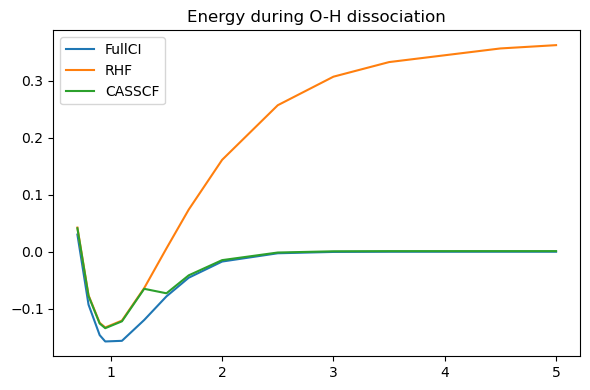

In [7]:
plt.figure(figsize=(6,4))
plt.title('Energy during O-H dissociation')
x = np.array(distlist)
y = np.array(E_FCI)
z = np.array(E_hf)
zz = np.array(E_CASSCF)
plt.plot(x,y, label='FullCI')
plt.plot(x,z, label='RHF')
plt.plot(x,zz, label='CASSCF')
plt.legend()
plt.tight_layout(); plt.show()

In [8]:
# Run again the 1.1 Å Hartree-Fock
mol_str = mol_template.replace("OHdist", "1.1")
molecule = vlx.Molecule.read_molecule_string(mol_str, units='angstrom')
basis = vlx.MolecularBasis.read(molecule, "STO-3G")
scf_results = scf_drv.compute(molecule, basis)

In [9]:
viewer = mtp.OrbitalViewer()
viewer.plot(molecule, basis, scf_drv.mol_orbs)

Output()

Dropdown(description='Orbital:', index=4, options=(('  1 occ=2.000 ene=-20.243  (alpha HOMO-4)', 0), ('  2 occ…

Checkbox(value=False, description='Active')

Output()

In [10]:
E_CASSCF=[]

# Initialise our first guess to 2 Å
mol_str = mol_template.replace("OHdist", "2")
molecule = vlx.Molecule.read_molecule_string(mol_str, units='angstrom')
basis = vlx.MolecularBasis.read(molecule, "STO-3G")
scf_results = scf_drv.compute(molecule, basis)

space = mtp.OrbSpace(molecule, scf_drv.mol_orbs)
space.cas(2,2)

# Scan over O-H distances in reverse order
for dist in distlist[::-1]:
    mol_str = mol_template.replace("OHdist", str(dist))
    molecule = vlx.Molecule.read_molecule_string(mol_str, units='angstrom')

    mcscf_results = Mcscf_drv.compute(molecule, basis, space)
    E_CASSCF.append(mcscf_results["energies"][0] - E_H_hf - E_OH_hf)

E_CASSCF = E_CASSCF[::-1] # Reorder the energies

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.814517828     0.0e+00      1.1e-02          0        0.40    0:00:00


        2     -74.825176298    -1.1e-02      2.3e-04          0        0.40    0:00:00


        3     -74.825391905    -2.2e-04      3.0e-05          0        0.40    0:00:00


        4     -74.825474303    -8.2e-05      1.6e-05          0        0.48    0:00:00


        5     -74.825507838    -3.4e-05      5.5e-06          0        0.58    0:00:00


        6     -74.825513926    -6.1e-06      6.1e-07          0        0.69    0:00:00


        7     -74.825514699    -7.7e-07      5.4e-08          0        0.80    0:00:00


        8     -74.825514778    -7.9e-08      9.6e-09          0        0.80    0:00:00


        9     -74.825514788    -1.0e-08      9.5e-10          0        0.80    0:00:00


       10     -74.825514789    -9.8e-10      6.3e-11          0        0.80    0:00:00
** Convergence reached in 10 iterations


       11     -74.825514789    -6.5e-11      1.7e-12          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.82551478908292
  - Natural orbitals
1.00018 0.99982
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.481912 a.u.         1.224899 Debye                                     
                                   Z   :        -0.170394 a.u.        -0.433098 Debye                                     
                                 Total :         0.511149 a.u.         1.299212 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.825514929     0.0e+00      8.9e-09          0        0.40    0:00:00
** Convergence reached in 1 iterations


        2     -74.825514937    -7.8e-09      1.2e-10          0        0.40    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.82551493653318
  - Natural orbitals
1.00103 0.99897
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.481913 a.u.         1.224900 Debye                                     
                                   Z   :        -0.170393 a.u.        -0.433096 Debye                                     
                                 Total :         0.511149 a.u.         1.299212 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.825546998     0.0e+00      1.8e-06          0        0.40    0:00:00


        2     -74.825548664    -1.7e-06      2.9e-08          0        0.40    0:00:00


        3     -74.825548689    -2.5e-08      1.7e-10          0        0.40    0:00:00


        4     -74.825548689    -1.3e-10      2.1e-11          0        0.40    0:00:00
** Convergence reached in 4 iterations


        5     -74.825548689    -4.1e-11      1.1e-11          0        0.48    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.82554868910634
  - Natural orbitals
1.01744 0.98256
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.481934 a.u.         1.224954 Debye                                     
                                   Z   :        -0.170331 a.u.        -0.432937 Debye                                     
                                 Total :         0.511149 a.u.         1.299210 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.825826203     0.0e+00      9.6e-06          0        0.40    0:00:00


        2     -74.825835184    -9.0e-06      1.7e-07          0        0.40    0:00:00


        3     -74.825835372    -1.9e-07      5.5e-09          0        0.40    0:00:00


        4     -74.825835382    -9.8e-09      2.4e-09          0        0.40    0:00:00


** Convergence reached in 4 iterations


        5     -74.825835392    -9.9e-09      4.9e-10          0        0.56    0:00:00


                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.82583539179285
  - Natural orbitals
1.05669 0.94331
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                          
               Molecular Orbital No.   1:                                           

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.482170 a.u.         1.225555 Debye                                     
                                   Z   :        -0.169871 a.u.        -0.431770 Debye                                     
                                 Total :         0.511219 a.u.         1.299388 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.827907847     0.0e+00      7.5e-05          0        0.40    0:00:00


        2     -74.827975659    -6.8e-05      2.3e-06          0        0.40    0:00:00


        3     -74.827978893    -3.2e-06      3.2e-07          0        0.48    0:00:00


        4     -74.827979674    -7.8e-07      1.5e-07          0        0.58    0:00:00


        5     -74.827980225    -5.5e-07      2.6e-08          0        0.80    0:00:00


        6     -74.827980263    -3.8e-08      1.5e-09          0        0.80    0:00:00


        7     -74.827980265    -1.8e-09      1.1e-11          0        0.80    0:00:00


** Convergence reached in 7 iterations


        8     -74.827980265    -1.5e-11      1.0e-12          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.82798026509964
  - Natural orbitals
1.16464 0.83536
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.484003 a.u.         1.230212 Debye                                     
                                   Z   :        -0.166216 a.u.        -0.422478 Debye                                     
                                 Total :         0.511748 a.u.         1.300734 Debye                                     
                                                                                                                          


                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.840703331     0.0e+00      6.0e-04          0        0.40    0:00:00


        2     -74.841178958    -4.8e-04      5.4e-05          0        0.40    0:00:00


        3     -74.841271298    -9.2e-05      1.2e-05          0        0.48    0:00:00


        4     -74.841307185    -3.6e-05      4.8e-06          0        0.58    0:00:00


        5     -74.841319643    -1.2e-05      6.0e-07          0        0.69    0:00:00


        6     -74.841320497    -8.5e-07      2.2e-08          0        0.80    0:00:00


        7     -74.841320530    -3.3e-08      1.6e-09          0        0.80    0:00:00


        8     -74.841320532    -2.4e-09      3.8e-10          0        0.80    0:00:00
** Convergence reached in 8 iterations


        9     -74.841320533    -5.8e-10      1.4e-11          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.84132053283871
  - Natural orbitals
1.42192 0.57808
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.494497 a.u.         1.256885 Debye                                     
                                   Z   :        -0.133257 a.u.        -0.338704 Debye                                     
                                 Total :         0.512137 a.u.         1.301723 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.866784870     0.0e+00      1.1e-03          0        0.40    0:00:00


        2     -74.867537542    -7.5e-04      1.7e-04          0        0.40    0:00:00


        3     -74.867871423    -3.3e-04      3.6e-05          0        0.48    0:00:00


        4     -74.867945837    -7.4e-05      1.2e-05          0        0.58    0:00:00


        5     -74.867961787    -1.6e-05      4.9e-07          0        0.69    0:00:00


        6     -74.867962389    -6.0e-07      2.7e-08          0        0.69    0:00:00


        7     -74.867962443    -5.3e-08      6.4e-09          0        0.80    0:00:00


        8     -74.867962453    -1.0e-08      6.9e-10          0        0.80    0:00:00


        9     -74.867962453    -7.5e-10      1.7e-11          0        0.80    0:00:00
** Convergence reached in 9 iterations


       10     -74.867962453    -2.0e-11      1.7e-13          0        0.80    0:00:00


                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.86796245341523
  - Natural orbitals
1.65377 0.34623
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                          
               Molecular Orbital No.   1:                                           

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.510293 a.u.         1.297035 Debye                                     
                                   Z   :        -0.051024 a.u.        -0.129689 Debye                                     
                                 Total :         0.512837 a.u.         1.303502 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.898353989     0.0e+00      1.3e-03          0        0.40    0:00:00


        2     -74.899027749    -6.7e-04      1.9e-04          0        0.40    0:00:00


        3     -74.899388171    -3.6e-04      4.2e-05          0        0.48    0:00:00


        4     -74.899429406    -4.1e-05      8.0e-06          0        0.58    0:00:00


        5     -74.899435161    -5.8e-06      1.3e-07          0        0.69    0:00:00


        6     -74.899435386    -2.2e-07      2.3e-08          0        0.69    0:00:00


        7     -74.899435437    -5.1e-08      4.9e-09          0        0.80    0:00:00


        8     -74.899435441    -4.4e-09      2.6e-10          0        0.80    0:00:00
** Convergence reached in 8 iterations


        9     -74.899435442    -2.2e-10      3.8e-12          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.89943544160629
  - Natural orbitals
1.79682 0.20318
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.522345 a.u.         1.327668 Debye                                     
                                   Z   :         0.048872 a.u.         0.124220 Debye                                     
                                 Total :         0.524626 a.u.         1.333466 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.938757037     0.0e+00      2.3e-03          0        0.40    0:00:00


        2     -74.939681485    -9.2e-04      2.8e-04          0        0.40    0:00:00


        3     -74.940128842    -4.5e-04      6.3e-05          0        0.48    0:00:00


        4     -74.940161100    -3.2e-05      6.8e-06          0        0.58    0:00:00


        5     -74.940163972    -2.9e-06      6.5e-08          0        0.69    0:00:00


        6     -74.940164153    -1.8e-07      3.1e-08          0        0.69    0:00:00


        7     -74.940164205    -5.3e-08      4.7e-09          0        0.80    0:00:00


        8     -74.940164208    -2.3e-09      1.5e-10          0        0.80    0:00:00
** Convergence reached in 8 iterations


        9     -74.940164208    -1.1e-10      4.1e-12          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.94016420761837
  - Natural orbitals
1.89831 0.10169
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.531714 a.u.         1.351482 Debye                                     
                                   Z   :         0.170131 a.u.         0.432430 Debye                                     
                                 Total :         0.558269 a.u.         1.418979 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.975431866     0.0e+00      3.9e-03          0        0.40    0:00:00


        2     -74.976454870    -1.0e-03      3.3e-04          0        0.40    0:00:00


        3     -74.976872713    -4.2e-04      8.7e-05          0        0.48    0:00:00


        4     -74.976897749    -2.5e-05      5.4e-06          0        0.58    0:00:00


        5     -74.976899244    -1.5e-06      2.1e-08          0        0.69    0:00:00


        6     -74.976899364    -1.2e-07      3.5e-08          0        0.69    0:00:00


        7     -74.976899403    -3.9e-08      5.0e-09          0        0.80    0:00:00


        8     -74.976899405    -2.0e-09      1.7e-10          0        0.80    0:00:00


** Convergence reached in 8 iterations


        9     -74.976899406    -1.2e-10      7.3e-12          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.97689940560029
  - Natural orbitals
1.95549 0.04451
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.539842 a.u.         1.372143 Debye                                     
                                   Z   :         0.284788 a.u.         0.723858 Debye                                     
                                 Total :         0.610355 a.u.         1.551369 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.977881657     0.0e+00      3.7e-03          0        0.40    0:00:00


        2     -74.978501031    -6.2e-04      2.2e-04          0        0.40    0:00:00


        3     -74.978729498    -2.3e-04      8.4e-05          0        0.48    0:00:00


        4     -74.978742701    -1.3e-05      3.8e-06          0        0.58    0:00:00


        5     -74.978743362    -6.6e-07      9.7e-09          0        0.69    0:00:00


        6     -74.978743407    -4.5e-08      2.0e-08          0        0.69    0:00:00


        7     -74.978743424    -1.7e-08      3.0e-09          0        0.80    0:00:00


        8     -74.978743426    -1.6e-09      2.1e-10          0        0.80    0:00:00
** Convergence reached in 8 iterations


        9     -74.978743426    -1.4e-10      1.1e-11          0        0.80    0:00:00


                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.97874342582152
  - Natural orbitals
1.97752 0.02248
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                          
               Molecular Orbital No.   1:                                           

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.549822 a.u.         1.397507 Debye                                     
                                   Z   :         0.354434 a.u.         0.900882 Debye                                     
                                 Total :         0.654162 a.u.         1.662713 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)



               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
               State-specific calculation
                - State of interest          :   1
               Max. iterations               :   50
               BFGS window                   :   5
               Convergence thresholds:
                - Energy change              :   1e-08
                - Gra

        1     -74.967809023     0.0e+00      5.9e-04          0        0.40    0:00:00


        2     -74.967891793    -8.3e-05      2.9e-05          0        0.40    0:00:00


        3     -74.967918061    -2.6e-05      1.3e-05          0        0.48    0:00:00


        4     -74.967919230    -1.2e-06      6.6e-07          0        0.48    0:00:00


        5     -74.967919290    -5.9e-08      2.4e-09          0        0.58    0:00:00


        6     -74.967919291    -1.5e-09      5.6e-10          0        0.58    0:00:00
** Convergence reached in 6 iterations


        7     -74.967919291    -1.7e-10      1.6e-11          0        0.69    0:00:00


                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.96791929117138
  - Natural orbitals
1.98225 0.01775
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                          
               Molecular Orbital No.   1:                                           

                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.554878 a.u.         1.410359 Debye                                     
                                   Z   :         0.373533 a.u.         0.949427 Debye                                     
                                 Total :         0.668892 a.u.         1.700154 Debye                                     
                                                                                                                          


                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.914850622     0.0e+00      2.9e-03          0        0.40    0:00:00


        2     -74.915201779    -3.5e-04      1.3e-04          0        0.40    0:00:00


        3     -74.915312244    -1.1e-04      6.2e-05          0        0.48    0:00:00


        4     -74.915321193    -8.9e-06      3.3e-06          0        0.58    0:00:00


        5     -74.915321681    -4.9e-07      1.5e-08          0        0.69    0:00:00


        6     -74.915321711    -3.0e-08      1.1e-08          0        0.69    0:00:00


        7     -74.915321723    -1.1e-08      3.7e-09          0        0.80    0:00:00


        8     -74.915321725    -2.6e-09      6.9e-10          0        0.80    0:00:00
** Convergence reached in 8 iterations


        9     -74.915321726    -4.2e-10      6.8e-11          0        0.80    0:00:00


                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.9153217258869
  - Natural orbitals
1.98905 0.01095
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                          
               Molecular Orbital No.   1:                                            

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.569087 a.u.         1.446476 Debye                                     
                                   Z   :         0.403644 a.u.         1.025960 Debye                                     
                                 Total :         0.697702 a.u.         1.773383 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.792755151     0.0e+00      4.0e-03          0        0.40    0:00:00


        2     -74.793189243    -4.3e-04      1.6e-04          0        0.40    0:00:00


        3     -74.793306690    -1.2e-04      7.0e-05          0        0.48    0:00:00


        4     -74.793321538    -1.5e-05      3.3e-06          0        0.58    0:00:00


        5     -74.793322462    -9.2e-07      4.6e-08          0        0.69    0:00:00


        6     -74.793322597    -1.4e-07      5.4e-08          0        0.80    0:00:00


        7     -74.793322669    -7.2e-08      3.6e-08          0        0.80    0:00:00


        8     -74.793322691    -2.2e-08      6.8e-09          0        0.80    0:00:00


        9     -74.793322695    -3.6e-09      5.1e-10          0        0.80    0:00:00
** Convergence reached in 9 iterations


       10     -74.793322695    -3.0e-10      2.6e-11          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.79332269521015
  - Natural orbitals
1.99334 0.00666
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.590886 a.u.         1.501882 Debye                                     
                                   Z   :         0.419037 a.u.         1.065086 Debye                                     
                                 Total :         0.724388 a.u.         1.841210 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


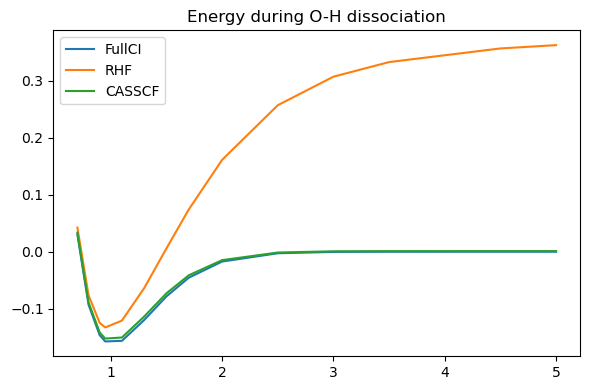

In [11]:
plt.figure(figsize=(6,4))
plt.title('Energy during O-H dissociation')
x = np.array(distlist)
y = np.array(E_FCI)
z = np.array(E_hf)
zz = np.array(E_CASSCF)
plt.plot(x, y, label='FullCI')
plt.plot(x, z, label='RHF')
plt.plot(x, zz, label='CASSCF')
plt.legend()
plt.tight_layout(); plt.show()

In [12]:
water_stretched = """
O 0.0000 0.0000  0.0000
H 0.0000 0.8957 -0.3167
H 0.0000 0.0000  1.5
"""
molecule = vlx.Molecule.read_molecule_string(water_stretched, units='angstrom')
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()
scf_results = scf_drv.compute(molecule, basis)

In [13]:
nbas = basis.get_dimensions_of_basis()

V_nuc = molecule.nuclear_repulsion_energy()

# one-electron Hamiltonian
kinetic_drv = vlx.KineticEnergyDriver()
T = kinetic_drv.compute(molecule, basis).full_matrix().to_numpy()

nucpot_drv = vlx.NuclearPotentialDriver()
V = -nucpot_drv.compute(molecule, basis).full_matrix().to_numpy()

h = T + V 

# two-electron Hamiltonian
fock_drv = vlx.FockDriver()
g = fock_drv.compute_eri(molecule, basis)

def CI_integrals(C, nIn, nAct, h,g):
    Cact = C[:, nIn:nIn+nAct] # Active MOs
    
    # Compute the inactive Fock matrix
    Din = np.einsum('ik,jk->ij', C[:, :nIn], C[:, :nIn]) #inactive density
    Jin = np.einsum('ijkl,kl->ij', g, Din)
    Kin = np.einsum('ilkj,kl->ij', g, Din)
    Fin = h + 2*Jin - Kin
    
    # Transform to MO basis
    Ftu = np.einsum("pq, qu, pt->tu", Fin, Cact, Cact)
    
    # Inactive energy:
    Ein = np.einsum('ij,ij->', h + Fin, Din) + V_nuc

    # Compute the MO 2-electron integrals
    pqrw = np.einsum("pqrs,sw->pqrw", g   , Cact)
    pqvw = np.einsum("pqrw,rv->pqvw", pqrw, Cact)
    puvw = np.einsum("pqvw,qu->puvw", pqvw, Cact)
    # Above intermediate will also be used later
    tuvw = np.einsum("puvw,pt->tuvw", puvw, Cact)
    return Ein, Ftu, tuvw, Fin, puvw

In [14]:
max_iter = 40
conv_thresh = 1e-4

space=mtp.OrbSpace(molecule, scf_drv.mol_orbs) # MolSpace will store the orbitals for us
space.cas(2,2)

nIn = space.n_inactive # Number of inactive orbitals
nAct = space.n_active # Number of active orbitals

CIdrv = mtp.CIDriver(ostream="silent") # Deactivate printing

print("iter    MCSCF energy    Error norm")

for iter in range(max_iter):
    C = space.molecular_orbitals.alpha_to_numpy()
    Cact = C[:, nIn:nIn+nAct] #Active MOs
    
    # Obtain the integrals needed for CI
    Ein, Ftu, tuvw, Fin, puvw = CI_integrals(C, nIn, nAct, h, g)
    
    # Feed them to the CI driver and compute the CI energy
    CIdrv._update_integrals(Ein, Ftu, tuvw)
    ci_results = CIdrv.compute(molecule, basis, space) #Compute only the ground state
    E = ci_results["energies"][0]
    
    # Obtain CI densities
    Dact = CIdrv.get_active_density(0)
    D2act = CIdrv.get_active_2body_density(0)
    
    # Active Fock matrix
    Dact_pq = np.einsum("tu,pt,qu->pq", Dact, Cact, Cact) #Transform to AO basis
    Jact = np.einsum('ijkl,kl->ij', g, Dact_pq)
    Kact = np.einsum('ilkj,kl->ij', g, Dact_pq)
    Fact = 2 * Jact - Kact
    
    # Form effective Fock matrix
    Feff = np.zeros((nbas,nbas))
    Feff[:nIn,:] = np.einsum("pq,pt,qn->tn", 2*Fin+Fact, C[:, :nIn], C) #Fiq
    Feff[nIn:nIn+nAct,:] = np.einsum("tu,pu,pq,qn->tn", Dact, Cact, Fin, C) #Ftq (1)
    Feff[nIn:nIn+nAct,:] += np.einsum("quvw,tuvw,qn->tn", puvw, D2act, C) #Ftq (2)
    
    # Form gradient 2(Fpq-Fqp)
    G = 2 * (Feff - np.transpose(Feff))
    
    # Check convergence
    e_vec = np.reshape(G, -1)
    error = np.linalg.norm(e_vec)
    print(f'{iter+1:>2d}  {E:16.8f}  {error:10.2e}')
    if error < conv_thresh:
        print('MCSCF iterations converged!')
        break
    
    # Extract some diagonals
    diag1 = np.einsum("pq,pm,qm->m", 2*Fin+Fact, C, C) # Diagonal of 2*Fin+Fact in MO basis
    diag2 = np.diagonal(Feff) # Diagonal of the effective Fock matrix
    
    # Form Hessian diagonal
    Hess = np.zeros((nbas,nbas))
    Hess[:nIn,nIn:] = 2* diag1[nIn:] - 2* diag1[:nIn].reshape(-1,1) #Sum of a line and column vectors
    Hess[nIn:nIn+nAct,:] = - 2 * diag2[nIn:nIn+nAct].reshape(-1, 1)
    Hess[nIn:nIn+nAct,nIn+nAct:] += np.einsum('tt,a->ta',Dact,diag1[nIn+nAct:])
    Hess[nIn:nIn+nAct,:nIn] += np.einsum('tt,a->ta',Dact,diag1[:nIn])
    Hess += np.transpose(Hess)
    Hess[:nIn,:nIn] = 1 # To avoid division by 0
    Hess[nIn + nAct:, nIn + nAct:] = 1 # To avoid division by 0
    
    # Finally, compute next step
    X = G / Hess
    expX = scipy.linalg.expm(X)
    newmo = np.matmul(C,expX)
    
    ene = np.zeros(nbas)
    occ = np.zeros(nbas)
    newmolorb = vlx.MolecularOrbitals([newmo], [ene], [occ], vlx.molorb.rest)
    space.molecular_orbitals = newmolorb

iter    MCSCF energy    Error norm
 1      -74.88252747    2.25e-01
 2      -74.89753572    6.02e-02
 3      -74.89903251    2.29e-02
 4      -74.89930538    1.40e-02
 5      -74.89938498    9.82e-03
 6      -74.89941463    6.75e-03
 7      -74.89942666    4.54e-03
 8      -74.89943169    3.03e-03
 9      -74.89943383    2.01e-03
10      -74.89943474    1.33e-03
11      -74.89943514    8.84e-04
12      -74.89943531    5.86e-04
13      -74.89943538    3.89e-04
14      -74.89943542    2.58e-04
15      -74.89943543    1.71e-04
16      -74.89943544    1.14e-04
17      -74.89943544    7.55e-05
MCSCF iterations converged!


In [15]:
# Compare to the MCSCF driver of multipsi
space = mtp.OrbSpace(molecule, scf_drv.mol_orbs)
space.cas(2,2)

Mcscf_drv = mtp.McscfDriver()
mcscf_results = Mcscf_drv.compute(molecule, basis, space)

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 4
               Number of active orbitals:              2
               Number of virtual orbitals:             1

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -74.882527473     0.0e+00      6.3e-03          0        0.40    0:00:00


        2     -74.897532702    -1.5e-02      4.5e-04          0        0.40    0:00:00


        3     -74.899246261    -1.7e-03      1.6e-04          0        0.48    0:00:00


        4     -74.899382179    -1.4e-04      2.9e-05          0        0.48    0:00:00


        5     -74.899429125    -4.7e-05      3.2e-06          0        0.58    0:00:00


        6     -74.899434664    -5.5e-06      4.8e-07          0        0.69    0:00:00


        7     -74.899435330    -6.7e-07      5.7e-08          0        0.80    0:00:00


        8     -74.899435422    -9.2e-08      1.7e-08          0        0.80    0:00:00


        9     -74.899435440    -1.9e-08      1.7e-09          0        0.80    0:00:00


       10     -74.899435442    -1.1e-09      6.0e-11          0        0.80    0:00:00
** Convergence reached in 10 iterations


       11     -74.899435442    -3.9e-11      1.5e-12          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -74.89943544160907
  - Natural orbitals
1.79682 0.20318
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.522345 a.u.         1.327669 Debye                                     
                                   Z   :         0.048871 a.u.         0.124218 Debye                                     
                                 Total :         0.524626 a.u.         1.333467 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


In [16]:
h2o_xyz = """3
water                                                                                                                          
O    0.000000000000        0.000000000000        0.000000000000                         
H    0.000000000000        0.740848095288        0.582094932012                         
H    0.000000000000       -0.740848095288        0.582094932012
"""

molecule = vlx.Molecule.read_xyz_string(h2o_xyz)

basis = vlx.MolecularBasis.read(molecule, "6-31G")

scf_drv = vlx.ScfRestrictedDriver(ostream=vlx.OutputStream(None))
scf_results = scf_drv.compute(molecule, basis)

space = mtp.OrbSpace(molecule,scf_drv.mol_orbs)
space.cisd()

expansion = mtp.CIExpansion(space)

print("Number of CISD Determinants  :", expansion.n_determinants)

space.cas(6,5)

expansion = mtp.CIExpansion(space)
print("Number of MCSCF Determinants :", expansion.n_determinants)

space.mrcisd()

expansion = mtp.CIExpansion(space)

print("Number of MRCISD Determinants:", expansion.n_determinants)

Number of CISD Determinants  : 2241
Number of MCSCF Determinants : 100


Number of MRCISD Determinants: 62490


In [17]:
space.cas(6,5)

mcscf_drv = mtp.McscfDriver()
mcscf_results = mcscf_drv.compute(molecule,basis,space)

space.mrcisd() # Assumes a CAS has been defined before
#cidrv = mtp.CIDriver()
#mrci_results = cidrv.compute(molecule,basis,space)

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 2
               Number of active orbitals:              5
               Number of virtual orbitals:             6

               This is a CASSCF wavefunction: CAS(6,5)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
 

        1     -75.989917004     0.0e+00      4.6e-04          0        0.40    0:00:00


        2     -76.003710349    -1.4e-02      1.7e-03          0        0.40    0:00:00


        3     -76.029254401    -2.6e-02      6.1e-04          0        0.56    0:00:00


        4     -76.028259148     1.0e-03      1.4e-03          0        0.78    0:00:00


        5     -76.035182933    -6.9e-03      1.5e-04          0        0.39    0:00:00


        6     -76.035515093    -3.3e-04      2.3e-05          0        0.47    0:00:00


        7     -76.035602023    -8.7e-05      7.7e-06          0        0.47    0:00:00


        8     -76.035669073    -6.7e-05      4.3e-06          0        0.66    0:00:00


        9     -76.035671978    -2.9e-06      1.1e-06          0        0.66    0:00:00


       10     -76.035672878    -9.0e-07      6.2e-08          0        0.79    0:00:00


       11     -76.035672918    -4.0e-08      1.8e-08          0        0.79    0:00:00


       12     -76.035672931    -1.3e-08      1.2e-09          0        0.80    0:00:00


       13     -76.035672932    -9.8e-10      1.9e-10          0        0.80    0:00:00
** Convergence reached in 13 iterations


       14     -76.035672932    -1.9e-10      5.7e-12          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : -0.00  (multiplicity = 1.0 )
  - Energy : -76.03567293198017
  - Natural orbitals
1.99934 1.97953 1.97649 0.02258 0.02206
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                               

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :         0.987499 a.u.         2.509973 Debye                                     
                                 Total :         0.987499 a.u.         2.509973 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


In [18]:
space.cas(6,5)
space.mrcis()

#cidrv = mtp.CIDriver()
#mrcis_results = cidrv.compute(molecule,basis,space)

In [19]:
#print("Uncontracted MRCIS dynamical correlation:",
#          mrcis_results["energies"][0]-mcscf_results["energies"][0])